# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора


1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [42]:
import xlwings as xw


# Открываем файл Excel
wb = xw.Book('себестоимостьА_в1.xlsx')

# Выбираем лист "Рецептура"
sheet = wb.sheets['Рецептура']


In [43]:
# Получаем часть данных из листа "Рецептура"
wh_bread = sheet.range('C7:O7').expand('down').value
# заменяем Nan на 0
wh_bread = [[i if isinstance(i, float) or isinstance(i, str) else 0.0  for i in bread] for bread in wh_bread]

# Получаем данные из листа "Рецептура"   'Цена ресурсов, руб.'
wh_bread_price = sheet.range('G14:O14').value

In [44]:
wh_bread

[['Хлеб Венгерский',
  0.4,
  35.0,
  50.0,
  0.2,
  0.4,
  0.02,
  0.02,
  0.01,
  0.005,
  0.1,
  0.0,
  0.0],
 ['Хлеб "Барбари"',
  0.25,
  28.0,
  40.0,
  0.07,
  0.25,
  0.01,
  0.06,
  0.015,
  0.0,
  0.06,
  0.05,
  0.0],
 ['Багет парижский',
  0.25,
  35.0,
  50.0,
  0.12,
  0.22,
  0.005,
  0.0,
  0.009,
  0.005,
  0.0,
  0.05,
  0.03],
 ['Чиабатта',
  0.25,
  35.0,
  50.0,
  0.12,
  0.23,
  0.01,
  0.0,
  0.015,
  0.0,
  0.0,
  0.0,
  0.05]]

In [45]:
# находим себестоимость каждого хлеба
cost_price = []
for bread in wh_bread:
    cost_price.append([bread[0], sum(x * y for x, y in zip(bread[4:], wh_bread_price[4:]))])
    
print(*cost_price, sep='\n')
    

['Хлеб Венгерский', 123.75999999999999]
['Хлеб "Барбари"', 82.92]
['Багет парижский', 67.50500000000001]
['Чиабатта', 72.49000000000001]


2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [46]:
sheet.range('P5').value = 'себестоимость'
sheet.range('P7').options(transpose=True).value = [bread[1] for bread in cost_price]
sheet.range('P5:P10').color = (0,255,0)  # закрасила ячейки зеленым

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [ ]:
xw.sheets[0].activate()
xw.Range('B3:T3').merge()
xw.Range('T4:T6').merge()
xw.Range('B3:T3').color = (255, 255, 0)
xw.Range('T4:T6').color = (255, 192, 0)
xw.Range('T7:T13').color = (255, 255, 167)
xw.Range('B3:T3').HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter  # Выравнивание текста по горизонтали
xw.Range('B3:T3').VerticalAlignment = xw.constants.VAlign.xlVAlignCenter  # Выравнивание текста по вертикали
xw.Range('T4:T6').HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter  # Выравнивание текста по горизонтали
xw.Range('T4:T6').VerticalAlignment = xw.constants.VAlign.xlVAlignCenter  # Выравнивание текста по вертикали
xw.Range('T4:T6').api.Font.Color = xw.utils.rgb_to_int((255, 255, 255))  # Белый текст
xw.Range('T4:T6').api.Font.Bold = True
xw.Range('B3:T3').api.Font.Bold = True
rng = xw.Range('T4:T13')
rng.columns[0].column_width = len(rng.value[0])

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [57]:
import pandas as pd

In [58]:
reviews_sample = pd.read_csv('data/reviews_sample.csv', index_col=0)  # иначе первый столбец unnamed
recipes_sample = pd.read_csv('data/recipes_sample.csv', usecols=['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'])

In [59]:
print(reviews_sample.head())
print(recipes_sample.head())

           user_id  recipe_id        date  rating  \
370476       21752      57993  2003-05-01       5   
624300      431813     142201  2007-09-16       5   
187037      400708     252013  2008-01-10       4   
706134  2001852463     404716  2017-12-11       5   
312179       95810     129396  2008-03-14       5   

                                                   review  
370476  Last week whole sides of frozen salmon fillet ...  
624300  So simple and so tasty!  I used a yellow capsi...  
187037  Very nice breakfast HH, easy to make and yummy...  
706134  These are a favorite for the holidays and so e...  
312179  Excellent soup!  The tomato flavor is just gre...  
                                       name     id  minutes   submitted  \
0     george s at the cove  black bean soup  44123       90  2002-10-25   
1        healthy for them  yogurt popsicles  67664       10  2003-07-26   
2              i can t believe it s spinach  38798       30  2002-08-29   
3                    

2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [4]:
import pandas as pd

# Загрузка данных из файлов
reviews_sample = pd.read_csv('reviews_sample.csv', index_col=0)
recipes_sample = pd.read_csv('recipes_sample.csv', usecols=['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'], index_col=0)

# Случайный выбор 5% строк из каждой таблицы
reviews_5per = reviews_sample.sample(frac=0.05, random_state=1)
recipes_5per = recipes_sample.sample(frac=0.05, random_state=1)

# Создание Excel-файла и запись двух таблиц на разные листы
with pd.ExcelWriter('recipes.xlsx') as writer:
    reviews_5per.to_excel(writer, sheet_name='Рецепты')
    recipes_5per.to_excel(writer, sheet_name='Отзывы')

In [7]:
import xlwings as xw


# Cлучайным образом выберите 5% строк
reviews_5per = reviews_sample.sample(frac=0.05, random_state=1)  # random_state - Optional, specifies the seed of the random generator used
recipes_5per = recipes_sample.sample(frac=0.05, random_state=1)  

# Создание нового Excel-файла
wb = xw.Book()
sht1 = wb.sheets.add('Отзывы')
sht2 = wb.sheets.add('Рецепты')

# Запись данных на листы
sht1.range('A1').value = reviews_5per
sht2.range('A1').value = recipes_5per

# Сохранение файла
wb.save('recipes_2.xlsx')
#wb.close()

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [19]:
# Открываем файл Excel
#wb = xw.Book('recipes_2.xlsx')

# Выбираем лист "Рецептура"
sht1 = wb.sheets['Рецепты']
sht2 = wb.sheets['Отзывы']

#берем значения из столбца minutes и передаем в новый столбец
sht1.range('G2').options(transpose=True).value = [float(val)*60 for val in sht1.range('C2').expand('down').value]
sht1.range('G1').value = 'seconds_assign'


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [20]:
# Выбираем лист 'Рецепты'
sheet = wb.sheets['Рецепты']

# Добавляем заголовок для нового столбца
sheet.range('H1').value = 'seconds_formula'
sheet.range('H1').color = (0,255,0)

# находим номер последней строки (начинаем с 1)
#last_row = sheet.range('C' + str(sheet.cells.last_cell.row)).end('up').row
last_row = len(sheet.range('C1').expand('down').value)

# Напишем формулу для каждой строки столбца seconds_formula
for i in range(2, last_row+1):  # добавим 1 т.к. [  ;  )
    sheet.range('H'+str(i)).formula = '=C'+str(i)+'*60'  


5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [24]:
sheet.range('G1:H1').api.Font.Bold = True  # Делаем текст полужирным
sheet.range('G1:H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter  # Выравниваем по центру
sheet.range('G1:H1').column_width = 20  # изменим ширину ячейки для красоты

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [27]:
# находим номер последней строки (начинаем с 1)
last_row = len(sheet.range('C1').expand('down').value)

# Напишем формулу для каждой строки столбца seconds_formula
for i in range(2, last_row+1):  # добавим 1 т.к. [  ;  )
    cell_val = int(sheet.range('C'+str(i)).value)
    
    if cell_val <= 5:
        sheet.range('C'+str(i)).color = (0,255,0)
    elif 5 < cell_val <= 10:
        sheet.range('C'+str(i)).color = (255,255,0)
    else:
        sheet.range('C'+str(i)).color = (255,0,0)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.
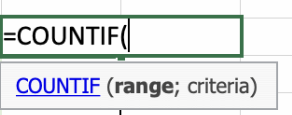

In [36]:
wb = xw.Book('recipes_2.xlsx')
sheet = wb.sheets['Рецепты']

# Определяем количество строк в столбце с отзывами
numrows = len(sheet.range('B1').expand('down').value)

# Добавляем заголовок для столбца n_reviews
sheet.range('I1').value = 'n_reviews'

# Создаем формулу для расчета количества отзывов для каждого рецепта
for i in range(2, numrows + 1):
    sheet.range(f'I{i}').formula = f'=COUNTIF(Отзывы!C:C, B{i})'

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [1]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

def validate(file_path):
    wb = load_workbook(file_path)
    # Метод load_workbook загружает файл книги Excel для последующей работы с ним
    sheet_reviews = wb['Отзывы']
    sheet_recipes = wb['Рецепты']

    # Устанавливаем красный цвет заливки
    red_fill = PatternFill(start_color='FF0000', end_color='FF0000', fill_type='solid')
    # Метод PatternFill позволяет задать заливку ячеек определенным узором или цветом.

    # Перебираем строки листа Отзывы и проверяем правила
    for idx, row in enumerate(sheet_reviews.iter_rows(min_row = 2, values_only = True), start = 2):
        '''Метод .iter_rows(min_row=2, values_only=True) из библиотеки openpyxl используется для 
        итерации по строкам указанного листа Excel, начиная с заданной строки (в данном случае с 2 строки)
        Параметр values_only=True указывает на то, что при итерации нужно получать только значения ячеек, а не объекты ячеек'''
        recipe_id, rating = row[0], row[1]
        if not (0 <= rating <= 5):
            # Если рейтинг не в диапазоне от 0 до 5, выделяем строку красным
            for cell in sheet_reviews.iter_rows(min_row = idx, max_row = idx, min_col = 1, max_col = len(row)):
                '''min_row=idx: Этот параметр указывает начальную строку для итерации
                   max_row=idx: Этот параметр указывает конечную строку для итерации
                   min_col=1: Этот параметр указывает начальный столбец для итерации. Здесь мы начинаем с первого столбца
                   max_col=len(row): Этот параметр указывает конечный столбец для итерации'''
                for c in cell:
                    c.fill = red_fill
                    # .fill определяет заливку ячейки
        elif recipe_id not in {recipe[0] for recipe in sheet_recipes.iter_rows(min_row = 2, max_col = 1, values_only = True)}:
            # Если рецепт отсутствует на листе Рецепты, выделяем строку красным
            for cell in sheet_reviews.iter_rows(min_row = idx, max_row = idx, min_col = 1, max_col = len(row)):
                for c in cell:
                    c.fill = red_fill

    wb.save(file_path)

# Пример использования функции
validate('recipes.xlsx')

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [5]:
import csv 


recipes_model = []  # Создаем пустой список для хранения данных из CSV файла

# Открываем CSV файл 'recipes_model.csv' для чтения с указанием кодировки
with open('recipes_model.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')  # Создаем объект reader для чтения CSV файла с разделителем '\t' (табуляция)
    
    # Проходимся по каждой строке в CSV файле
    for row in reader:
        recipes_model.append(row)  # Добавляем каждую строку в список recipes_model

# Создаем новую книгу Excel
wb2 = xw.Book()

# Устанавливаем имя первого листа в книге Excel на 'Модель'
wb2.sheets[0].name = 'Модель'

# Записываем данные из списка recipes_model в ячейку A2 нового листа в книге Excel
xw.Range('A2').value = recipes_model

wb2.save('recipes_model.xlsx')

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [6]:
import xlwings as xw


# Открытие книги
wb = xw.Book('recipes_model.xlsx')
sheet = wb.sheets['Модель']

# Добавление формулы в столбец J
sheet.range('J2').formula = '=CONCATENATE(B2, " ", UPPER(C2))'
sheet.range('J2').api.AutoFill(sheet.range('J2:J{}'.format(sheet.cells.last_cell.row)).api, 1)

# Сохранение и закрытие книги
wb.save()
wb.close()


11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [7]:
xw.Range('A2').expand('down').color = (0, 204, 2)
xw.Range('A2').expand().columns.autofit()
xw.Range('A2').expand('down').font.bold = True
xw.Range('A2').expand().api.AutoFilter(Field:=1)

True

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 